# Multiple Linear Regression
## Bike sharing assignment

#### Problem Statement:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("day.csv")

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
data.shape

(730, 16)

In [6]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


Let us first understand and remove the columns(predictors) which are not useful for our prediction.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From the above output, we can conclude none of the columns contains the **null** values.

The columns
1. **instant** is just the serial number for the row and it may not be useful for our prediction. Let us remove it.
2. **casual** and **registered** combine together to form the target variable **cnt** and they are part of the target variables. Hence we can remove them.

In [8]:
data.drop(["instant","casual","registered"],axis=1,inplace=True)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


As we already have predictor variables **yr** and **mnth**, only day from the column **dteday** is useful.Let us create a new column "day" from it and remove the column "dteday".

In [9]:
data["day"] = pd.DatetimeIndex(data["dteday"],dayfirst=True).day
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


In [10]:
data.tail()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,27
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,28
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,29
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,30
729,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,2729,31


In [11]:
data.drop(["dteday"],axis=1,inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


## Step 2: Data preparation and Visualising

Let's now spend some time doing what is arguably the most important step - **preparing the data**.
- Let us also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Here **season** is a categorical variable with (1:spring, 2:summer, 3:fall, 4:winter).   
Let us convert to readable form and check the relationship with the target variable **cnt**.

In [13]:
season_dict = {1:"season_spring",2:"season_summer",3:"season_fall",4:"season_winter"}
def get_season(x):
    return season_dict.get(x)

data["season"]=data.season.apply(get_season)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,season_spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,season_spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,season_spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,season_spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,season_spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


<AxesSubplot:xlabel='season'>

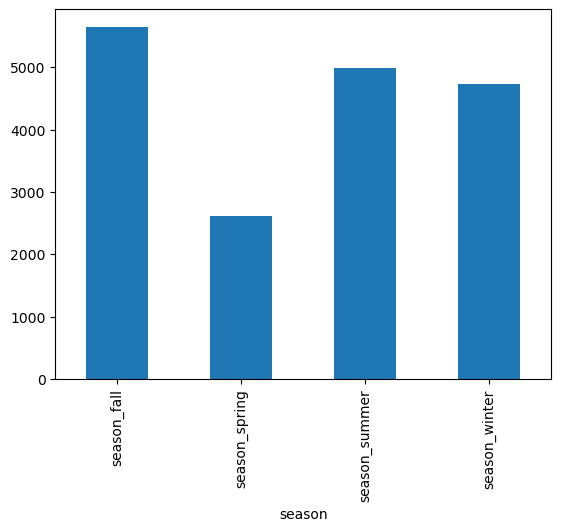

In [14]:
data.groupby(by="season")["cnt"].mean().plot(kind="bar")

Clearly, we can see **season** has some impact on the target variable **cnt**. Let us make the dummy variables for **season**.   
### Dummy Variables    
One way to deal with categorical variables is creating dummy variables. The key idea behind creating dummy variables is that for a categorical variable with ‘n’ levels, you create ‘n-1’ new columns each indicating whether that level exists or not using
a zero or one.

In [15]:
season_variables = pd.get_dummies(data['season'],drop_first = True)
data.drop(["season"],axis=1,inplace=True)
data = pd.concat([data, season_variables], axis = 1)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,season_spring,season_summer,season_winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0


Here we used the attribute **drop_first=True** which convert the categorical variable of 4 levels to 3 variables as follows: 

100 -> season_spring  
010 -> season_summer  
001 -> season_winter  
000 -> season_fall 


Similarly we create dummy variables for other categorical variables as well below.

Here **yr** is a categorical variable with (0: 2018, 1:2019).   
Let us convert to readable form and check the relationship with the target variable **cnt**.

In [16]:
data["yr_2019"]=data["yr"]
data.drop(["yr"],axis=1,inplace=True)
data.head()

,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,season_spring,season_summer,season_winter,yr_2019
0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0
3,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0
4,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0


<AxesSubplot:xlabel='yr_2019'>

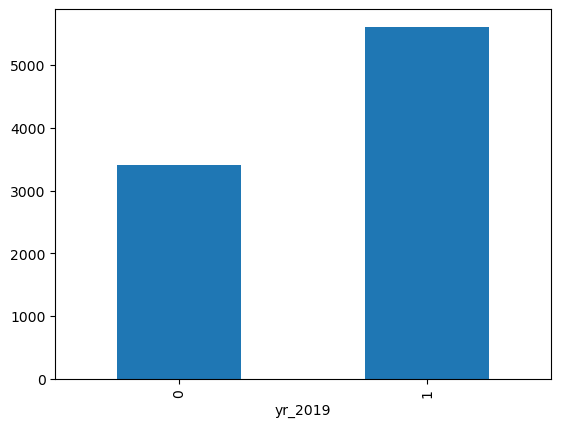

In [17]:
data.groupby(by="yr_2019")["cnt"].mean().plot.bar()

Clearly, we can see **yr_2019** has some impact on the target variable **cnt**. We can use it as one of the predictor.

In [18]:
data.head()

,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,season_spring,season_summer,season_winter,yr_2019
0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0
3,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0
4,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0


Here **mnth** is a categorical variable with month numbers 1 to 12.   
Let us check the relationship of **mnth** variable with the target variable **cnt**.

<AxesSubplot:xlabel='mnth'>

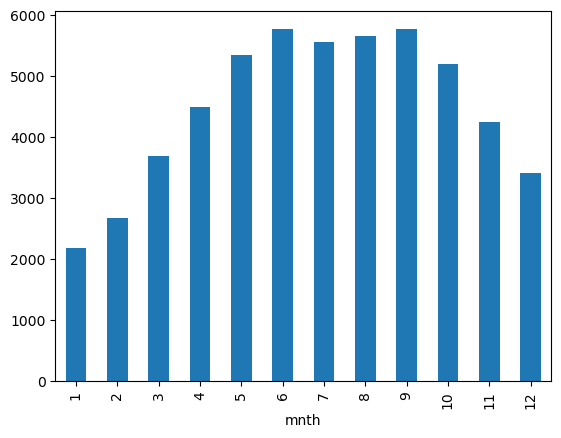

In [19]:
data.groupby(by="mnth")["cnt"].mean().plot.bar()

Clearly, we can see some of the "**mnth**"s has some impact on the target variable **cnt**. We can use it as one of the predictor.  
Let us create dummy_variables for **mnth**.

In [20]:
import calendar
data["mnth"]=data["mnth"].apply(lambda x:calendar.month_name[x])
month_variables = pd.get_dummies(data['mnth'],prefix="month_",drop_first = True)
data.drop(["mnth"],axis=1,inplace=True)
data = pd.concat([data, month_variables], axis = 1)


In [21]:
data.head()

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,season_spring,season_summer,season_winter,yr_2019,month__August,month__December,month__February,month__January,month__July,month__June,month__March,month__May,month__November,month__October,month__September
0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='holiday'>

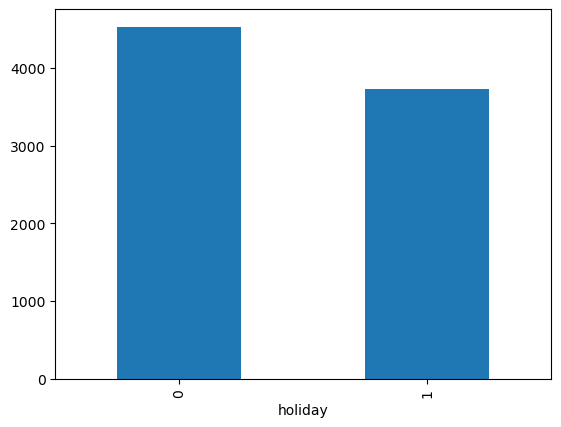

In [22]:
data.groupby(by="holiday")["cnt"].mean().plot.bar()

Clearly, we can see the variable **holiday** has some impact on the target variable **cnt**. We can use it as one of the predictor.

In [23]:
data.head()

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,season_spring,season_summer,season_winter,yr_2019,month__August,month__December,month__February,month__January,month__July,month__June,month__March,month__May,month__November,month__October,month__September
0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Here **weekday** is a categorical variable.   
Let us check the relationship of **weekday** variable with the target variable **cnt**.

<AxesSubplot:xlabel='weekday'>

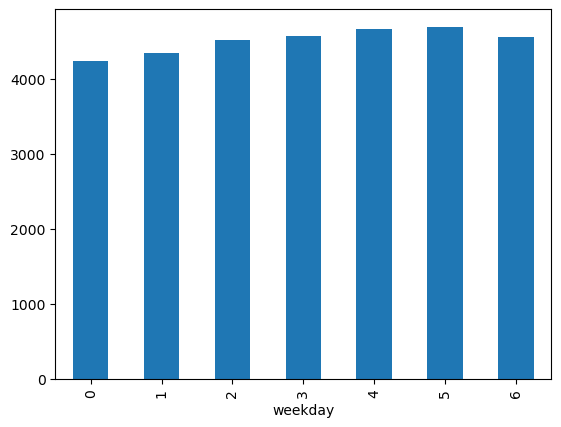

In [24]:
data.groupby(by="weekday")["cnt"].mean().plot.bar()

From the above plot, we can see sloght impact of **weekday** in target variable **cnt**.  
Let us create dummy_variables for **weekday**.

In [25]:
weekday_variables = pd.get_dummies(data['weekday'],prefix="weekday",drop_first = True)
data.drop(["weekday"],axis=1,inplace=True)
data = pd.concat([data, weekday_variables], axis = 1)

In [26]:
data.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,season_spring,season_summer,season_winter,yr_2019,month__August,month__December,month__February,month__January,month__July,month__June,month__March,month__May,month__November,month__October,month__September,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:xlabel='workingday'>

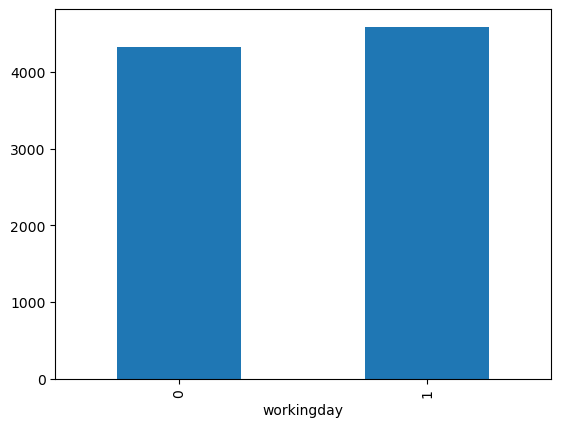

In [27]:
data.groupby(by="workingday")["cnt"].mean().plot.bar()

In [28]:
data.groupby(by="workingday")["cnt"].mean()

workingday
0    4330.168831
1    4590.332665
Name: cnt, dtype: float64

Clearly, we can see the variable **workingday** has slight impact on the target variable **cnt**.   

Here **weathersit** is a categorical variable with 
1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   
Let us check the relationship with the target variable **cnt**.

<AxesSubplot:xlabel='weathersit'>

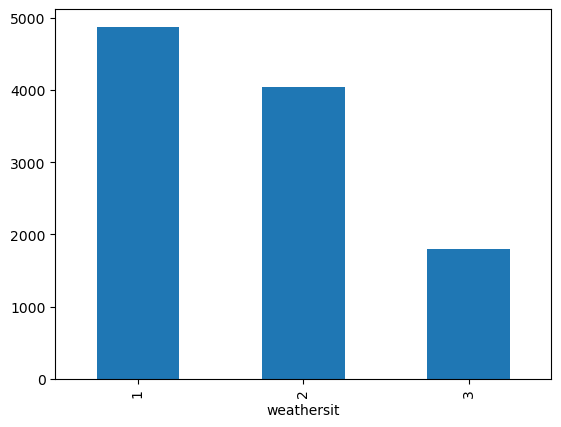

In [29]:
data.groupby(by="weathersit")["cnt"].mean().plot.bar()

Clearly, we can see **weathersit** has some impact on the target variable **cnt**. Let us make the dummy variables for weathersit.

In [30]:
weathersit_variables = pd.get_dummies(data['weathersit'],drop_first = True,prefix="weathersit")
data.drop(["weathersit"],axis=1,inplace=True)
data = pd.concat([data, weathersit_variables], axis = 1)
data.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,season_spring,season_summer,season_winter,yr_2019,month__August,month__December,month__February,month__January,month__July,month__June,month__March,month__May,month__November,month__October,month__September,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:xlabel='day'>

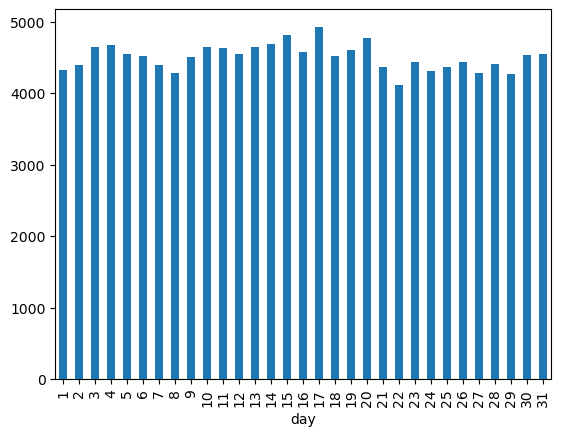

In [31]:
data.groupby(by="day")["cnt"].mean().plot.bar()

In [32]:
data.groupby(by="day")["cnt"].mean()

day
1     4320.500000
2     4390.875000
3     4648.375000
4     4680.625000
5     4546.458333
6     4525.000000
7     4395.250000
8     4282.083333
9     4501.708333
10    4651.875000
11    4631.083333
12    4552.375000
13    4643.666667
14    4683.583333
15    4819.875000
16    4576.541667
17    4927.291667
18    4518.208333
19    4599.458333
20    4779.041667
21    4363.125000
22    4119.291667
23    4435.166667
24    4316.916667
25    4366.708333
26    4431.666667
27    4281.083333
28    4409.666667
29    4265.227273
30    4538.409091
31    4544.642857
Name: cnt, dtype: float64

Clearly, we can see **day** has some impact on the target variable **cnt**. Let us make the dummy variables for day.

In [33]:
day_variables = pd.get_dummies(data['day'],drop_first = True,prefix="day_number")
data.drop(["day"],axis=1,inplace=True)
data = pd.concat([data, day_variables], axis = 1)
data.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,month__August,month__December,month__February,month__January,month__July,month__June,month__March,month__May,month__November,month__October,month__September,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,day_number_2,day_number_3,day_number_4,day_number_5,day_number_6,day_number_7,day_number_8,day_number_9,day_number_10,day_number_11,day_number_12,day_number_13,day_number_14,day_number_15,day_number_16,day_number_17,day_number_18,day_number_19,day_number_20,day_number_21,day_number_22,day_number_23,day_number_24,day_number_25,day_number_26,day_number_27,day_number_28,day_number_29,day_number_30,day_number_31
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let us now find the correlation between the continuous variables available.

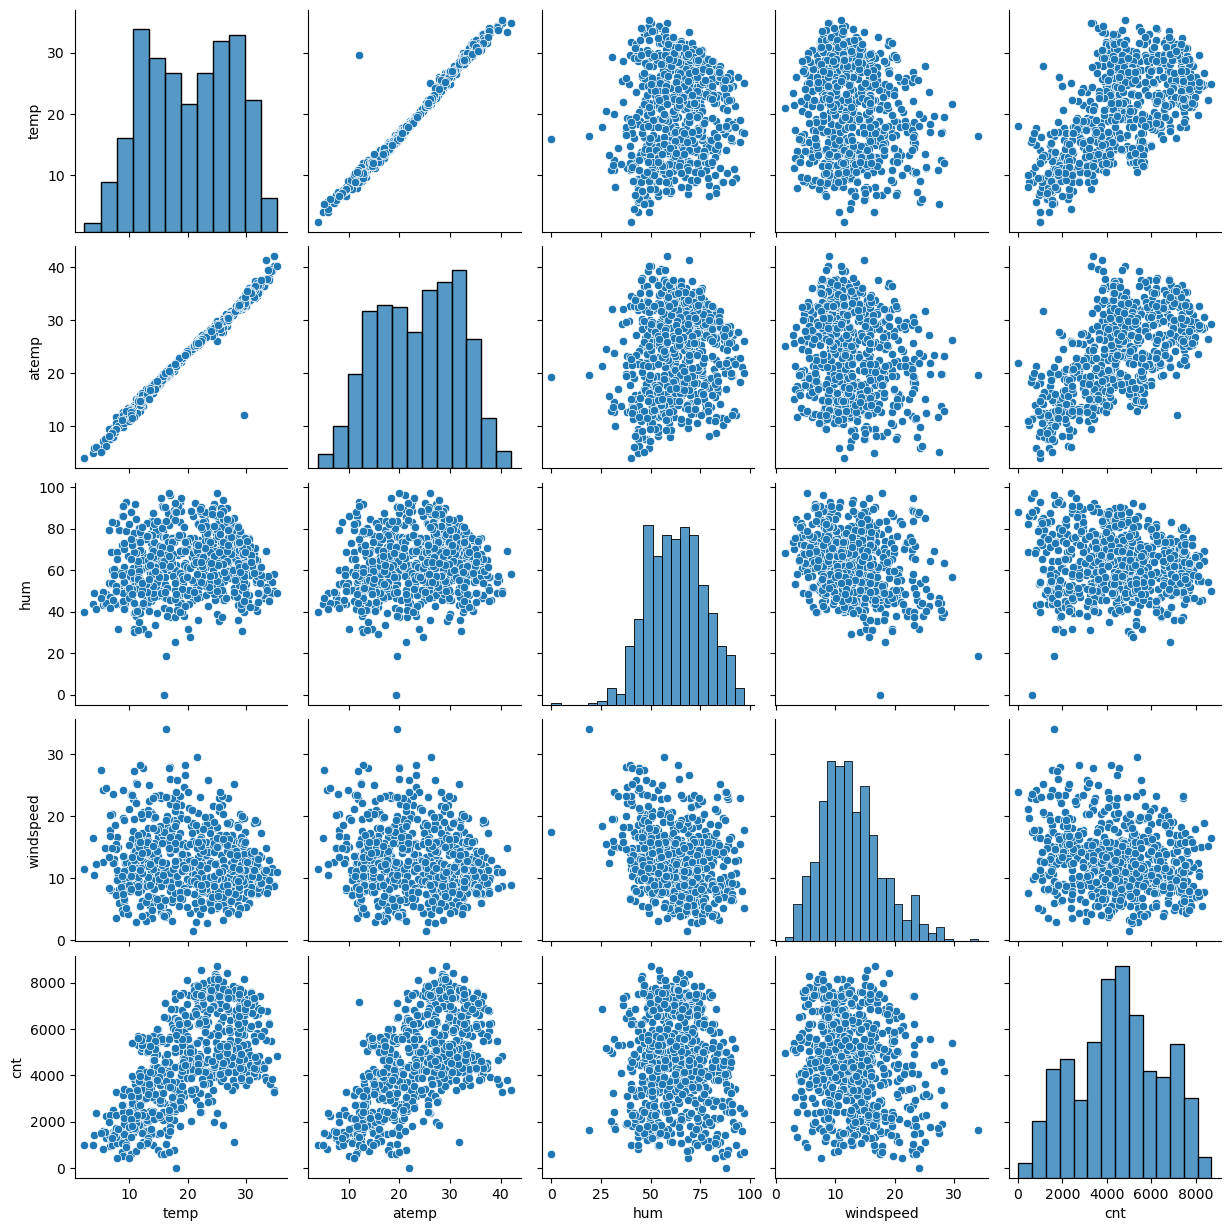

In [34]:
sns.pairplot(data[["temp","atemp","hum","windspeed","cnt"]])
plt.show()

In [35]:
data.shape

(730, 60)

Hence after data preparation, it contains 730 rows and 60 columns.

In [36]:
data.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'month__August', 'month__December', 'month__February', 'month__January',
       'month__July', 'month__June', 'month__March', 'month__May',
       'month__November', 'month__October', 'month__September', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_2', 'weathersit_3', 'day_number_2', 'day_number_3',
       'day_number_4', 'day_number_5', 'day_number_6', 'day_number_7',
       'day_number_8', 'day_number_9', 'day_number_10', 'day_number_11',
       'day_number_12', 'day_number_13', 'day_number_14', 'day_number_15',
       'day_number_16', 'day_number_17', 'day_number_18', 'day_number_19',
       'day_number_20', 'day_number_21', 'day_number_22', 'day_number_23',
       'day_number_24', 'day_number_25', 'day_number_26', 'day_number_27',
       'day_number_28', 'day_number_29', 'da

## Step 3: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [37]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
print(df_train.shape)
print(df_test.shape)

(510, 60)
(219, 60)


### Rescaling the Features 

Another important aspect to consider is feature scaling. When you have a lot
of independent variables in a model, a lot of them might be on very different scales which will lead a
model with very weird coefficients that might be difficult to interpret. So we need to scale features
because of two reasons:
1. Ease of interpretation
2. Faster convergence for gradient descent methods 

You can scale the features using two very popular method:
1. **Standardizing**: The variables are scaled in such a way that their mean is zero and standard deviation is one.   
x = x-mean(x)/sd(x)
2. **MinMax Scaling**: The variables are scaled in such a way that all the values lie between zero and one using the maximum and the minimum values in the data.   
x = x-min(x)/max(x)-min(x)


This time, we will use MinMax scaling.

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
# Apply scaling to all the continuous variables
cont_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[cont_vars] = scaler.fit_transform(df_train[cont_vars])

df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,month__August,month__December,month__February,month__January,month__July,month__June,month__March,month__May,month__November,month__October,month__September,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,day_number_2,day_number_3,day_number_4,day_number_5,day_number_6,day_number_7,day_number_8,day_number_9,day_number_10,day_number_11,day_number_12,day_number_13,day_number_14,day_number_15,day_number_16,day_number_17,day_number_18,day_number_19,day_number_20,day_number_21,day_number_22,day_number_23,day_number_24,day_number_25,day_number_26,day_number_27,day_number_28,day_number_29,day_number_30,day_number_31
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [41]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,month__August,month__December,month__February,month__January,month__July,month__June,month__March,month__May,month__November,month__October,month__September,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,day_number_2,day_number_3,day_number_4,day_number_5,day_number_6,day_number_7,day_number_8,day_number_9,day_number_10,day_number_11,day_number_12,day_number_13,day_number_14,day_number_15,day_number_16,day_number_17,day_number_18,day_number_19,day_number_20,day_number_21,day_number_22,day_number_23,day_number_24,day_number_25,day_number_26,day_number_27,day_number_28,day_number_29,day_number_30,day_number_31
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412,0.041176,0.037255,0.031373,0.029412,0.031373,0.029412,0.027451,0.029412,0.031373,0.033333,0.037255,0.029412,0.031373,0.029412,0.033333,0.033333,0.029412,0.037255,0.033333,0.041176,0.039216,0.025490,0.037255,0.027451,0.031373,0.029412,0.031373,0.035294,0.029412,0.017647
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124,0.198893,0.189572,0.174494,0.169124,0.174494,0.169124,0.163554,0.169124,0.174494,0.179682,0.189572,0.169124,0.174494,0.169124,0.179682,0.179682,0.169124,0.189572,0.179682,0.198893,0.194298,0.157763,0.189572,0.163554,0.174494,0.169124,0.174494,0.184703,0.169124,0.131794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

### Dividing into X and Y sets for the model building

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [44]:
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,month__August,month__December,month__February,month__January,month__July,month__June,month__March,month__May,month__November,month__October,month__September,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,day_number_2,day_number_3,day_number_4,day_number_5,day_number_6,day_number_7,day_number_8,day_number_9,day_number_10,day_number_11,day_number_12,day_number_13,day_number_14,day_number_15,day_number_16,day_number_17,day_number_18,day_number_19,day_number_20,day_number_21,day_number_22,day_number_23,day_number_24,day_number_25,day_number_26,day_number_27,day_number_28,day_number_29,day_number_30,day_number_31
653,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
728,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Step 4: Building our model



### Feature selection

Selecting the correct features is also an important aspect in building the model. But choosing to drop the correct features (that are redundant and not adding any value to the model) is quite essential.So let’s talk about the various methods for optimal feature selection:
1. Try all possible combinations (2^p models for p features)   
   1.1.Time consuming and practically unfeasible
2. Manual Feature Elimination   
   2.1 Build model    
   2.2 Drop features that are least helpful in prediction (high p-value)    
   2.3 Drop features that are redundant (using correlations, VIF)    
   2.4 Rebuild model and repeat
3. Automated Approach    
   3.1 Recursive Feature Elimination(RFE)    
   3.2 Forward/Backward/Stepwise Selection based on AIC (not covered)

Itis generally recommended that you follow a balanced approach, i.e., use a combination of automated (coarse tuning) + manual (fine tuning) selection in order to get an optimal model.

### RFE
Recursive feature elimination

In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('month__August', False, 40),
 ('month__December', False, 5),
 ('month__February', False, 13),
 ('month__January', False, 4),
 ('month__July', True, 1),
 ('month__June', False, 34),
 ('month__March', False, 36),
 ('month__May', False, 19),
 ('month__November', False, 6),
 ('month__October', False, 33),
 ('month__September', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 2),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('day_number_2', False, 18),
 ('day_number_3', False, 17),
 ('day_number_4', False, 25),
 ('day_number_5', False, 29),
 ('day_number_6', False, 21),
 ('day_number_7', False, 39),
 ('day_number_8', False, 31),


In [48]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'yr_2019', 'month__July',
       'month__September', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weathersit_2', 'weathersit_3', 'day_number_17',
       'day_number_31'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'month__August', 'month__December', 'month__February',
       'month__January', 'month__June', 'month__March', 'month__May',
       'month__November', 'month__October', 'weekday_6', 'day_number_2',
       'day_number_3', 'day_number_4', 'day_number_5', 'day_number_6',
       'day_number_7', 'day_number_8', 'day_number_9', 'day_number_10',
       'day_number_11', 'day_number_12', 'day_number_13', 'day_number_14',
       'day_number_15', 'day_number_16', 'day_number_18', 'day_number_19',
       'day_number_20', 'day_number_21', 'day_number_22', 'day_number_23',
       'day_number_24', 'day_number_25', 'day_number_26', 'day_number_27',
       'day_number_28', 'day_number_29', 'day_number_30'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [50]:
import statsmodels.api as sm 

In [51]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     139.6
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          8.41e-184
Time:                        18:36:38   Log-Likelihood:                 512.44
No. Observations:                 510   AIC:                            -984.9
Df Residuals:                     490   BIC:                            -900.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3188      0.032  

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,holiday,inf
12,weekday_2,inf
15,weekday_5,inf
14,weekday_4,inf
13,weekday_3,inf
1,workingday,inf
11,weekday_1,inf
2,temp,370.08
3,atemp,367.99
4,hum,23.60


We can see some of the variables has **infinite VIF** which indicates there is high correlation between the variables. Let us drop some independent variables and build the model.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `weekday_3` as it has a high p-value of `0.814`. Let's go ahead and drop this variable.

In [54]:
X_train_rfe = X_train_rfe.drop(["weekday_3"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     139.6
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          8.41e-184
Time:                        18:36:38   Log-Likelihood:                 512.44
No. Observations:                 510   AIC:                            -984.9
Df Residuals:                     490   BIC:                            -900.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3188      0.032  

In [55]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,370.08
3,atemp,367.99
4,hum,23.60
1,workingday,6.53
5,windspeed,4.14
6,season_spring,2.58
15,weathersit_2,2.26
7,season_winter,2.12
11,weekday_1,2.10
8,yr_2019,2.07


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `weekday_5` as it has a high p-value of `0.734`. Let's go ahead and drop this variable.

In [56]:
X_train_rfe = X_train_rfe.drop(["weekday_5"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.7
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          7.22e-185
Time:                        18:36:38   Log-Likelihood:                 512.38
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     491   BIC:                            -906.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3191      0.032  

In [57]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,368.86
3,atemp,366.81
4,hum,23.58
1,workingday,4.58
5,windspeed,4.14
6,season_spring,2.58
14,weathersit_2,2.25
7,season_winter,2.12
8,yr_2019,2.07
11,weekday_1,1.66


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `weekday_4` as it has a high p-value of `0.396`. Let's go ahead and drop this variable.

In [58]:
X_train_rfe = X_train_rfe.drop(["weekday_4"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     156.4
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          8.13e-186
Time:                        18:36:38   Log-Likelihood:                 512.01
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     492   BIC:                            -911.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3188      0.032  

In [59]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,367.04
3,atemp,364.97
4,hum,23.58
5,windspeed,4.14
1,workingday,3.80
6,season_spring,2.58
13,weathersit_2,2.25
7,season_winter,2.12
8,yr_2019,2.07
11,weekday_1,1.47


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `weekday_2` as it has a high p-value of `0.396`. Let's go ahead and drop this variable.

In [60]:
X_train_rfe = X_train_rfe.drop(["weekday_2"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.2
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          8.87e-187
Time:                        18:36:38   Log-Likelihood:                 511.63
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     493   BIC:                            -917.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3196      0.032  

In [61]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,366.56
3,atemp,364.59
4,hum,23.58
5,windspeed,4.14
1,workingday,3.41
6,season_spring,2.58
12,weathersit_2,2.24
7,season_winter,2.12
8,yr_2019,2.07
9,month__July,1.41


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `weekday_1` as it has a high p-value of `0.228`. Let's go ahead and drop this variable.

In [62]:
X_train_rfe = X_train_rfe.drop(["weekday_1"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     177.0
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          1.35e-187
Time:                        18:36:38   Log-Likelihood:                 510.88
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     494   BIC:                            -922.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3201      0.032  

In [63]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,364.50
3,atemp,363.16
4,hum,23.54
5,windspeed,4.14
1,workingday,3.18
6,season_spring,2.57
11,weathersit_2,2.24
7,season_winter,2.12
8,yr_2019,2.06
9,month__July,1.41


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `atemp` as it has a high p-value of `0.184`. Let's go ahead and drop this variable.

In [64]:
X_train_rfe = X_train_rfe.drop(["atemp"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.3
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          2.33e-188
Time:                        18:36:38   Log-Likelihood:                 509.97
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     495   BIC:                            -926.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3229      0.032  

In [65]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.10
2,temp,15.67
4,windspeed,4.04
1,workingday,3.18
5,season_spring,2.57
10,weathersit_2,2.24
6,season_winter,2.10
7,yr_2019,2.06
8,month__July,1.41
11,weathersit_3,1.21


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `workingday` as it has a high p-value of `0.101`. Let's go ahead and drop this variable.

In [66]:
X_train_rfe = X_train_rfe.drop(["workingday"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          6.12e-189
Time:                        18:36:38   Log-Likelihood:                 508.58
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3332      0.031  

In [67]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.58
1,temp,15.36
3,windspeed,4.02
4,season_spring,2.54
9,weathersit_2,2.24
5,season_winter,2.09
6,yr_2019,2.06
7,month__July,1.40
10,weathersit_3,1.21
8,month__September,1.20


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `day_number_31` as it has a high p-value of `0.026`. Let's go ahead and drop this variable.

In [68]:
X_train_rfe = X_train_rfe.drop(["day_number_31"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          4.78e-189
Time:                        18:36:38   Log-Likelihood:                 506.03
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3358      0.031  

In [69]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.38
1,temp,15.32
3,windspeed,4.02
4,season_spring,2.54
9,weathersit_2,2.24
5,season_winter,2.09
6,yr_2019,2.06
7,month__July,1.40
10,weathersit_3,1.21
8,month__September,1.20


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `day_number_17` as it has a high p-value of `0.024`. Let's go ahead and drop this variable.

In [70]:
X_train_rfe = X_train_rfe.drop(["day_number_17"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.0
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          3.87e-189
Time:                        18:36:38   Log-Likelihood:                 503.41
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     498   BIC:                            -932.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3372      0.031  

In [71]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.37
1,temp,15.27
3,windspeed,4.02
4,season_spring,2.54
9,weathersit_2,2.23
5,season_winter,2.09
6,yr_2019,2.06
7,month__July,1.40
10,weathersit_3,1.21
8,month__September,1.20


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has a high VIF of `22.37`. Let's go ahead and drop this variable.

In [72]:
X_train_rfe = X_train_rfe.drop(["hum"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          1.16e-186
Time:                        18:36:38   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2519      0.024  

In [73]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.60
2,windspeed,4.00
5,yr_2019,2.06
3,season_spring,1.65
8,weathersit_2,1.51
4,season_winter,1.40
6,month__July,1.35
7,month__September,1.20
9,weathersit_3,1.08
0,holiday,1.04


Hence we have used the combination of both **automated(coarse tuning - RFA) and manual(fine tuning)** for eliminating the features.   
From the above result, we have selected the features which have less **p-value and less VIF(<5)**.

Hence our final model will be:   
**cnt = 0.2519 - 0.0986 X holiday + 0.4515 X temp - 0.1398 X windspeed - 0.1108 X season_spring + 0.0473 X season_winter + 0.2341 X yr_2019 - 0.0727 X month__July + 0.0577 X month__September - 0.0811 X weathersit_2 - 0.2864 X weathersit_3**
    

## Step 5: Analysing the residuals

### Let’s take a look at what the assumptions of simple linear regression were:
1. Linear relationship between X and Y
2. Error terms are normally distributed (not X, Y)
3. Error terms are independent of each other
4. Error terms have constant variance (homoscedasticity)

#### Let us check if Error terms are normally distributed

In [74]:
X_train_rfe = sm.add_constant(X_train_rfe)
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

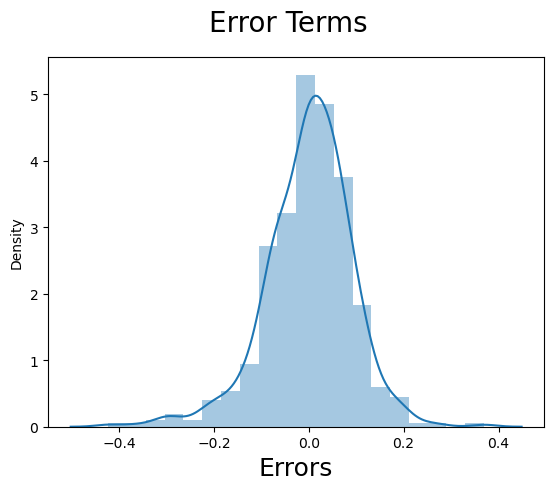

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

From the above graph, we can conclude the error terms are **normally distributed with mean 0**.

#### Let us check if Error terms are independent of each other

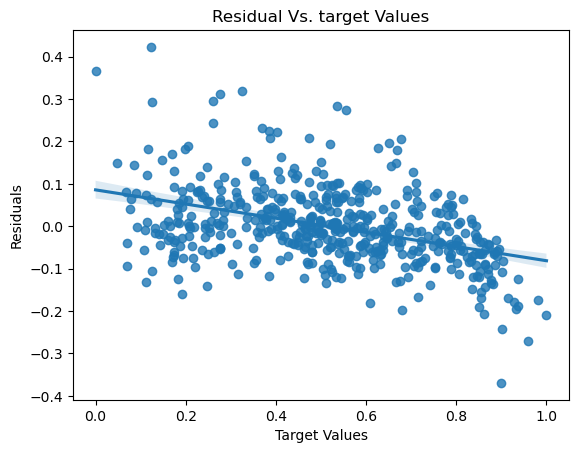

In [76]:
sns.regplot(x=y_train, y=y_train_pred-y_train)
plt.title('Residual Vs. target Values')
plt.xlabel('Target Values')
plt.ylabel('Residuals')
plt.show()


From the above graph, we can say error terms are independent and does not follow any pattern.

#### Let us check if Error terms have constant variance (homoscedasticity)

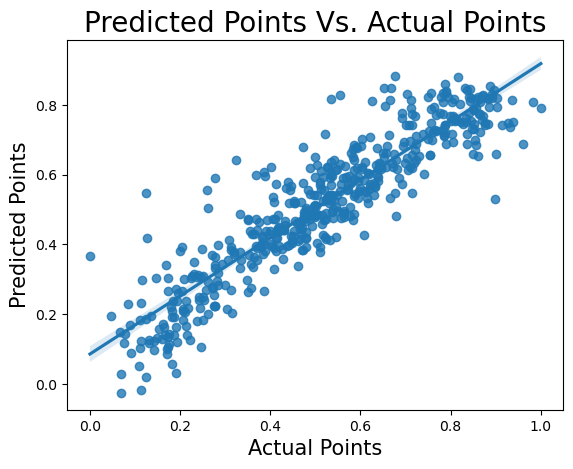

In [77]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

From the above graph we can say error terms follow homoscadasticity.

## Step 6:  Making Predictions Using the Final Model

#### Applying the scaling on the test sets    
Here we have to use the scalar object which is fit for the train data.

In [78]:
df_test[cont_vars] = scaler.transform(df_test[cont_vars])
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,month__August,month__December,month__February,month__January,month__July,month__June,month__March,month__May,month__November,month__October,month__September,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,day_number_2,day_number_3,day_number_4,day_number_5,day_number_6,day_number_7,day_number_8,day_number_9,day_number_10,day_number_11,day_number_12,day_number_13,day_number_14,day_number_15,day_number_16,day_number_17,day_number_18,day_number_19,day_number_20,day_number_21,day_number_22,day_number_23,day_number_24,day_number_25,day_number_26,day_number_27,day_number_28,day_number_29,day_number_30,day_number_31
184,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,month__August,month__December,month__February,month__January,month__July,month__June,month__March,month__May,month__November,month__October,month__September,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,day_number_2,day_number_3,day_number_4,day_number_5,day_number_6,day_number_7,day_number_8,day_number_9,day_number_10,day_number_11,day_number_12,day_number_13,day_number_14,day_number_15,day_number_16,day_number_17,day_number_18,day_number_19,day_number_20,day_number_21,day_number_22,day_number_23,day_number_24,day_number_25,day_number_26,day_number_27,day_number_28,day_number_29,day_number_30,day_number_31
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397,0.013699,0.022831,0.036530,0.036530,0.036530,0.041096,0.045662,0.041096,0.036530,0.031963,0.022831,0.041096,0.036530,0.041096,0.031963,0.031963,0.041096,0.022831,0.031963,0.013699,0.018265,0.050228,0.022831,0.045662,0.036530,0.041096,0.036530,0.018265,0.031963,0.022831
std,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612,0.116503,0.149707,0.188034,0.188034,0.188034,0.198967,0.209229,0.198967,0.188034,0.176306,0.149707,0.198967,0.188034,0.198967,0.176306,0.176306,0.198967,0.149707,0.176306,0.116503,0.134214,0.218916,0.149707,0.209229,0.188034,0.198967,0.188034,0.134214,0.176306,0.149707
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [80]:
y_test = df_test.pop('cnt')
X_test = df_test

In [81]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,holiday,temp,windspeed,season_spring,season_winter,yr_2019,month__July,month__September,weathersit_2,weathersit_3
184,1.0,1,0.831783,0.084219,0,0,0,1,0,1,0
535,1.0,0,0.901354,0.153728,0,0,1,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,0,0,0,1,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0,0


In [82]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

In [83]:
y_test_pred.head()

184    0.363229
535    0.871418
299    0.402446
221    0.602436
152    0.545710
dtype: float64

## Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

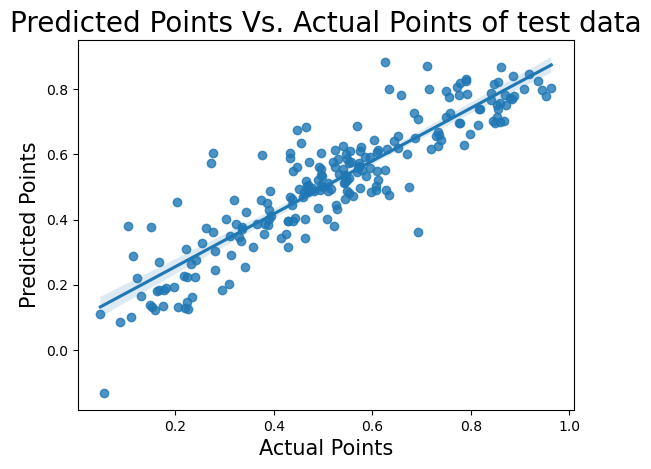

In [84]:
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Points Vs. Actual Points of test data', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

Let us find the R-square score on the test data.

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8070101019557961

Thus, for our model, 80.7% of variance in dependent variable **cnt** is explained by the independent variables.   
The final model is   

**cnt = 0.2519 - 0.0986 X holiday + 0.4515 X temp - 0.1398 X windspeed - 0.1108 X season_spring + 0.0473 X season_winter + 0.2341 X yr_2019 - 0.0727 X month__July + 0.0577 X month__September - 0.0811 X weathersit_2 - 0.2864 X weathersit_3**